In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import stopwords
from string import punctuation
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
lem = WordNetLemmatizer()
punct = list(punctuation)
sw = stopwords.words('english')
sp_char = [':','...',"'","''",'``']

In [185]:
sw = set(STOPWORDS)
sw.update(['much','make','now','wine','flavour','flavours','flavor','flavors','thank','travel','thanks','flight','great','awesome','please','fleet','fleek','good','love','go','u','leave','today','tomorrow','southwestair','americanair','usairways','united','virginamerica','jetblue'])
# ,'southwestair','americanair','usairways','united','virginamerica','jetblue'

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
def pre_process(tweet):
    def pos_tag_simplified(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return None
    # tweet = unidecode(tweet)
    tweet=tweet.lower()
    tweet = re.sub(r'\d+', '', tweet)
    tokens = word_tokenize(tweet)
    tokens=[i for i in tokens if i.isalpha()]
    cleaned_tokens = [token for token in tokens if token not in sw and token not in punct ]

    #stems=[ps.stem(token) for token in cleaned_tokens]
    tags=nltk.pos_tag(cleaned_tokens)
    wordnet_tagged = list(map(lambda x: (x[0], pos_tag_simplified(x[1])), tags))

    lemmatized=[]
    for word in wordnet_tagged:
        if word[1]!=None:
            lemmatized.append(lem.lemmatize(word[0],word[1]))
        else:
            lemmatized.append(lem.lemmatize(word[0]))
    return lemmatized

In [5]:
df['clean_txt'] = df['text'].apply(pre_process)

In [38]:
df.loc[18,['clean_txt','text']]

clean_txt                  fly virginamerica
text         I ❤️ flying @VirginAmerica. ☺️👍
Name: 18, dtype: object

In [9]:
df.loc[[1,2,3,4],['clean_txt','text']]

,clean_txt,text
1,virginamerica plus added commercial experience...,@VirginAmerica plus you've added commercials t...
2,virginamerica today must mean need take anothe...,@VirginAmerica I didn't today... Must mean I n...
3,virginamerica really aggressive blast obnoxiou...,@VirginAmerica it's really aggressive to blast...
4,virginamerica really big bad thing,@VirginAmerica and it's a really big bad thing...


In [8]:
df['clean_txt'] = df['clean_txt'].apply(lambda x:' '.join(x))

In [186]:
txt = ' '.join(df.clean_txt)

In [49]:
sw = set(STOPWORDS)
sw.update(['drink','now','wine','flavour','flavours','flavor','flavors','thank','travel','thanks'])

In [187]:
wrdcld = WordCloud(mode='RGBA',width=400,height=200,max_font_size=100,stopwords=sw,max_words=50,background_color='black').generate(txt)

Text(0.5, 1.0, 'Entire dataset')

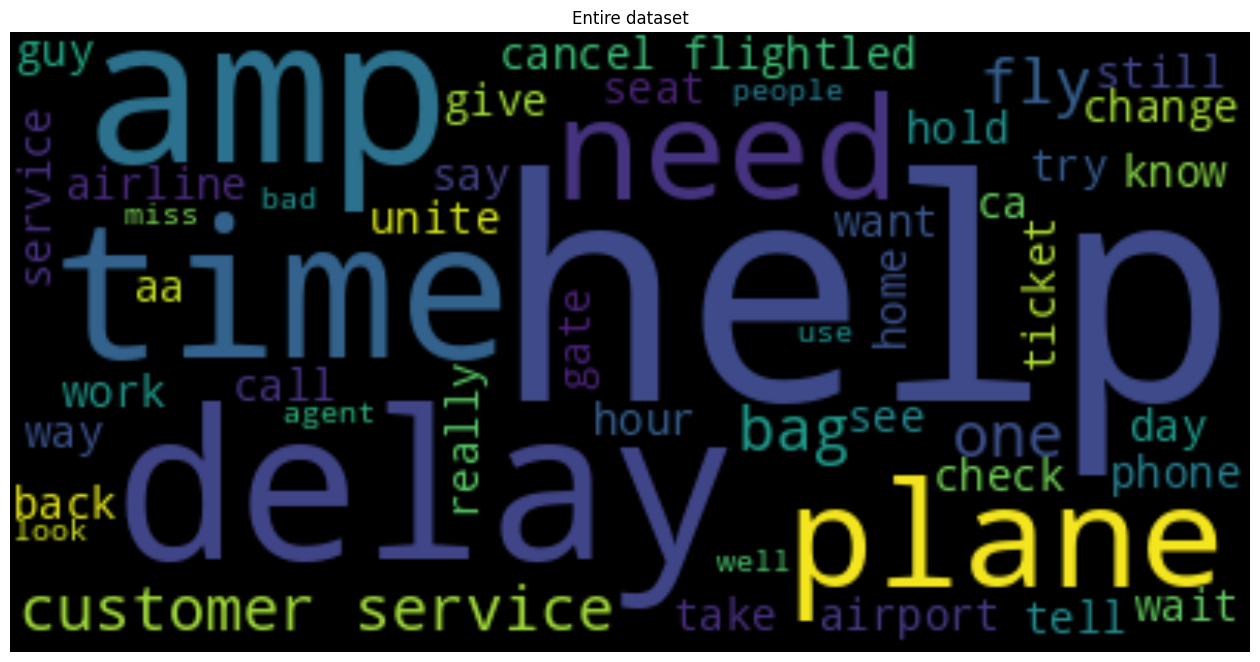

In [188]:
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='bilinear')
plt.axis('off')
plt.title("Entire dataset")

---

## Dividing into types of tweets

In [24]:
postive_twt = df.loc[df[df['airline_sentiment'] == 'positive'].index,['clean_txt']]

In [25]:
negative_twt = df.loc[df[df['airline_sentiment'] == 'negative'].index,['clean_txt']]

In [26]:
neutral_twt = df.loc[df[df['airline_sentiment'] == 'neutral'].index,['clean_txt']]

### WordCloud for positive tweets

In [189]:
txt = ' '.join(postive_twt.clean_txt)

In [190]:
wrdcld = WordCloud(mode='RGBA',width=400,height=200,max_font_size=100,stopwords=sw,max_words=50,background_color='black').generate(txt)

Text(0.5, 1.0, 'Positive tweets dataset')

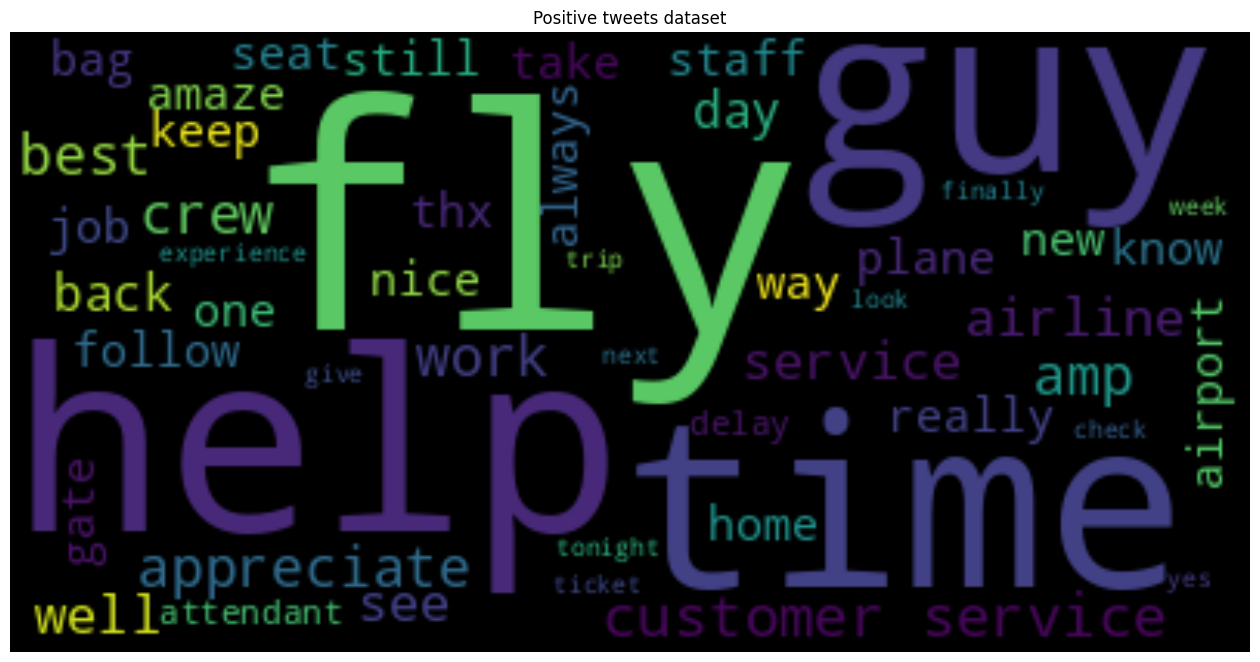

In [191]:
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='bilinear')
plt.axis('off')
plt.title("Positive tweets dataset")

In [74]:
sw = set(STOPWORDS)
sw.update(['drink','now','wine','flavour','flavours','flavor','flavors','thank','travel','thanks','flight','great','awesome','love'])
# ,'southwestair','americanair','usairways','united','virginamerica'

### WordCloud for negative tweets

In [192]:
txt = ' '.join(negative_twt.clean_txt)

In [193]:
wrdcld = WordCloud(mode='RGBA',width=400,height=200,max_font_size=100,stopwords=sw,max_words=50,background_color='black').generate(txt)

Text(0.5, 1.0, 'Negative tweets dataset')

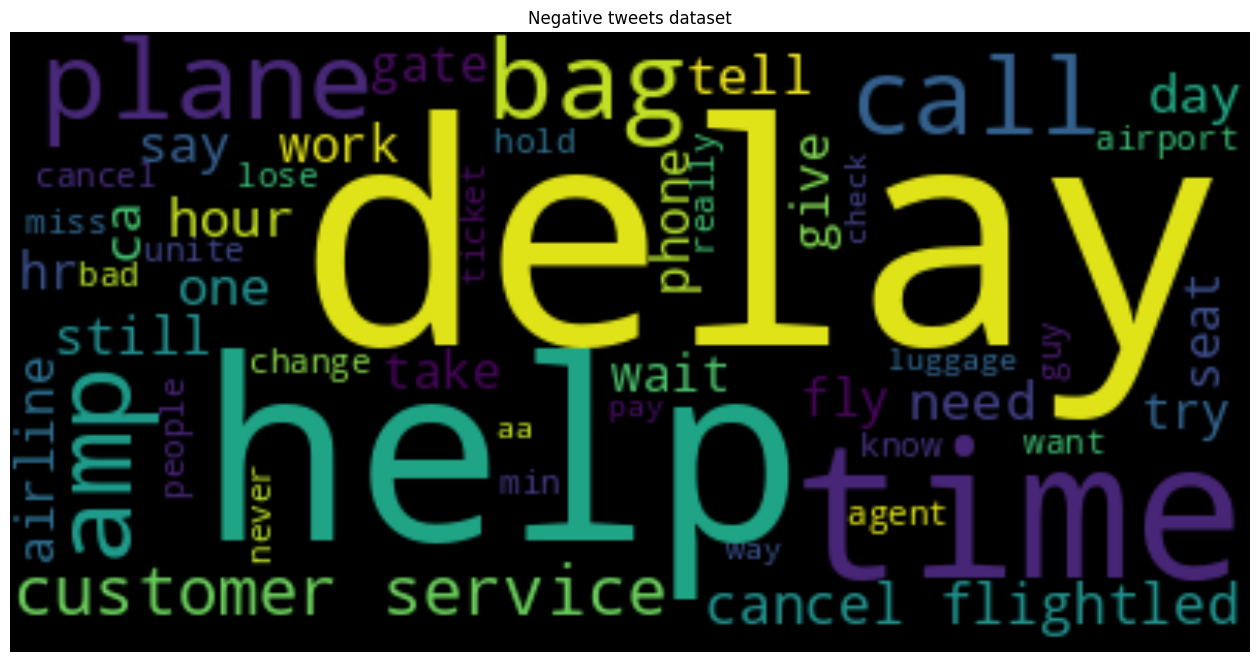

In [194]:
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='bilinear')
plt.axis('off')
plt.title("Negative tweets dataset")

In [74]:
sw = set(STOPWORDS)
sw.update(['drink','now','wine','flavour','flavours','flavor','flavors','thank','travel','thanks','flight','great','awesome','love'])
# ,'southwestair','americanair','usairways','united','virginamerica'

### Neutral tweets

In [195]:
txt = ' '.join(neutral_twt.clean_txt)

In [196]:
wrdcld = WordCloud(mode='RGBA',width=400,height=200,max_font_size=100,stopwords=sw,max_words=50,background_color='black').generate(txt)

Text(0.5, 1.0, 'Neutral tweets dataset')

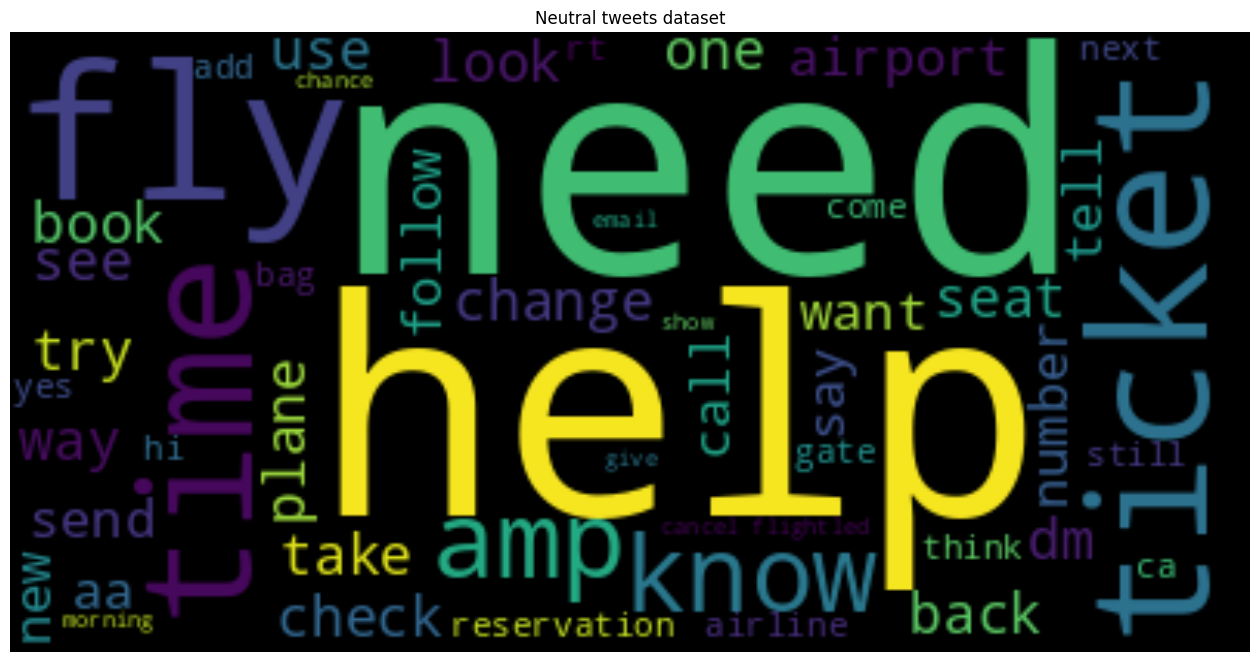

In [197]:
plt.figure(figsize=(16,9))
plt.imshow(wrdcld,interpolation='bilinear')
plt.axis('off')
plt.title("Neutral tweets dataset")

In [74]:
sw = set(STOPWORDS)
sw.update(['drink','now','wine','flavour','flavours','flavor','flavors','thank','travel','thanks','flight','great','awesome','love'])
# ,'southwestair','americanair','usairways','united','virginamerica'

---

In [198]:
df.groupby(['airline','airline_sentiment']).size()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64